In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_train=pd.read_csv('black-friday-train.csv')


# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


In [2]:
# df

In [3]:
#import the test data
df_test=pd.read_csv('black-friday-test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
#Merge both train and test data
df=pd.concat([df_test,df_train])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.drop(['User_ID'],axis=1,inplace=True)


In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [9]:
pd.get_dummies(df['Gender'])

,F,M
0,False,True
1,False,True
2,True,False
3,True,False
4,True,False
...,...,...
550063,False,True
550064,True,False
550065,True,False
550066,True,False


In [10]:
# Handling the categorical features

df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,26-35,1,C,1,0,4,5.0,12.0,NaN


In [11]:
# Handle categorical age features
df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [12]:
# pd.get_dummies(df['Age'],drop_first=True)

df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})


In [13]:
## SEcond technique to transform the data

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()


array([4, 2, 3, 1, 5, 6, 0])

In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,4,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,2,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,3,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,3,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,2,1,C,1,0,4,5.0,12.0,NaN


In [15]:
## fixing categorical city_category

df_city=pd.get_dummies(df['City_Category'],drop_first=True,dtype=int)

In [16]:
df_city.head()

,B,C
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [17]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,B,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,2,17,C,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,3,1,B,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,3,1,B,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,2,1,C,1,0,4,5.0,12.0,NaN,0,1


In [18]:
df.drop(['City_Category'],axis=1,inplace=True)

In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,3,1,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,3,1,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [20]:
##  Missing value

df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


In [21]:
## Focus on replacing missing vlues

df['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [22]:
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [23]:
df['Product_Category_2'].mode()[0]

8.0

In [24]:
# the best way to handle descrete missing value is the mode

df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [25]:
df['Product_Category_2'].isnull().sum()

0

In [26]:
## Product_Category_3 repalce , missing values

df['Product_Category_3'].unique()

array([nan, 12., 15.,  9., 16., 14.,  4.,  3.,  5.,  8., 17., 13., 11.,
       10.,  6., 18.])

In [27]:
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,46469
15.0,39968
14.0,26283
17.0,23818
5.0,23799
8.0,17861
9.0,16532
12.0,13115
13.0,7849


In [28]:
## replacing the mean vlue with the mode in the categorical 3
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,3,1,4+,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,3,1,4+,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [30]:
df.shape

(783667, 12)

In [31]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [32]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [33]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,3,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,3,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


In [35]:
##drop City Category Feature
# df.drop('City_Category',axis=1,inplace=True)

In [36]:
# convert Object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [37]:
## visualization
# sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

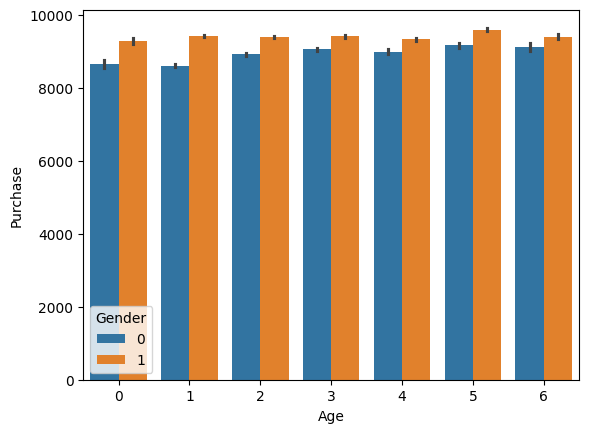

In [38]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

# Observation
we can see form the graph the female 0 is purchased less but Male(1) is puchased more then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

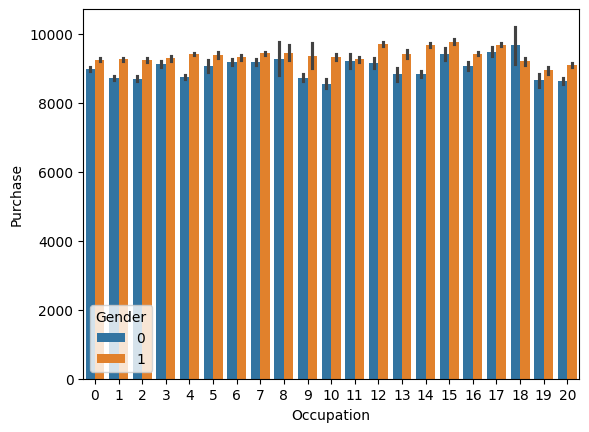

In [39]:
# visulization of purchase  with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

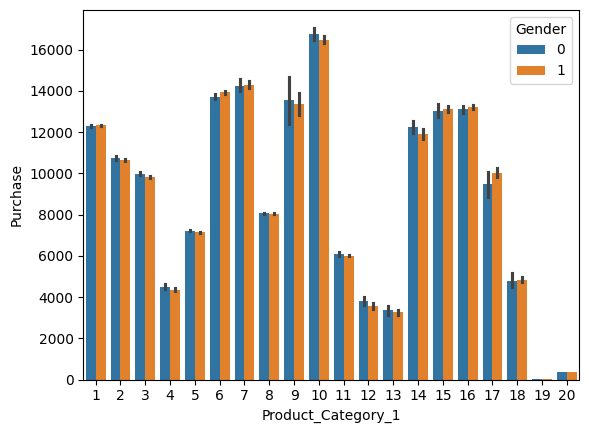

In [40]:
# we will see the between the purchase occupation

sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)
plt.show()

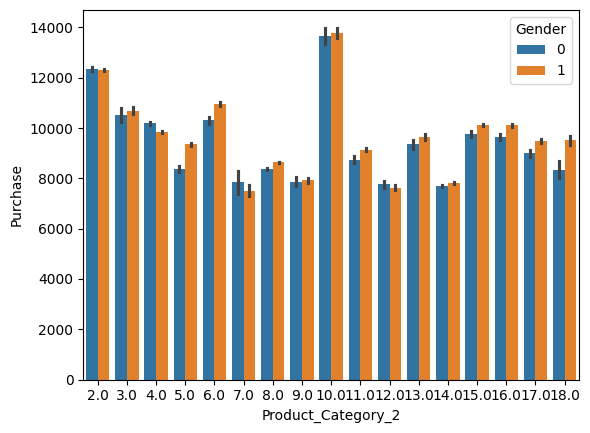

In [41]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)
plt.show()

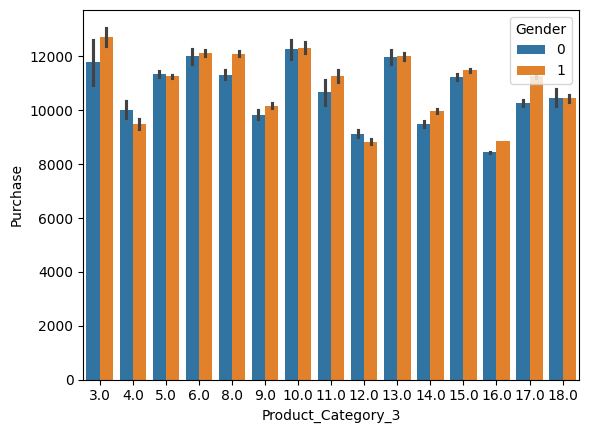

In [42]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)
plt.show()

In [43]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,3,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,3,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [44]:
# dividing the dataset into the train and test
df_test=df[df['Purchase'].isnull()]

In [45]:
df_train=df[~df['Purchase'].isnull()]

In [46]:
X=df_train.drop('Purchase',axis=1)


In [47]:
y=df_train['Purchase']

In [48]:
X.shape

(550068, 11)

In [49]:
y.shape

(550068,)

In [50]:
y.head()

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0


In [51]:
# Spliting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.33, random_state=42)

In [52]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [53]:
X_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,1,1,14,3,0,1,2.0,16.0,1,0
433826,1,5,0,0,1,8,16.0,16.0,0,0
516298,1,3,17,0,0,3,4.0,12.0,0,1
193380,1,2,4,1,0,8,16.0,16.0,1,0
273542,0,3,20,3,1,3,4.0,12.0,1,0


In [54]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [55]:
X_train.shape,X_test.shape

((368545, 10), (181523, 10))

#  Linear Regression Model


In [56]:
# training our model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# reg = LinearRegression().fit(X_train, y_train)

In [57]:
# reg.predict(X_test)

In [58]:
# reg.score(X_test,y_test)

In [59]:
# reg.score(X_train,y_train)

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier


In [61]:
# classifier=DecisionTreeClassifier(criterion='gini')
# classifier.fit(X_train,y_train)

 #its giving error memory allocation error

In [62]:
# Pre prunning
# parameter = {
#     'criterion' :['entropy','gini','log_loss'],
#     'splitter':['best','random'],
#     'max_depth':[1,2,3,4,5],
#     'max_features':['auto','sqrt','log2']
# }

# model = DecisionTreeClassifier()
# from sklearn.model_selection import GridSearchCV
# cv = GridSearchCV(model,param_grid = parameter,cv = 5)
# cv.fit(X_train,y_train)



# SVM

In [63]:
from sklearn.svm import SVC
model=SVC(kernel='linear')

**Random Forest**

In [64]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import make_regression

X, y = make_regression(n_features=10, n_informative=2,

                       random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=20, random_state=0)

regr.fit(X, y)

RandomForestRegressor(max_depth=20, random_state=0)

In [65]:
from sklearn.metrics import accuracy_score, classification_report

In [66]:
y_pred=regr.predict(X_test)

In [98]:
y_pred

array([  93.24195853, -108.03775143, -105.35006158, ...,  -25.30878386,
         68.40169571,  -24.94429709])

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute Error: {mae:.2f}')

print(f'Mean Squared Error: {mse:.2f}')

print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 9275.76
Mean Squared Error: 111199661.39
R-squared: -3.41


**Decision Tree Preprunning**

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [72]:
from sklearn.model_selection import GridSearchCV

In [76]:
treemodel=DecisionTreeRegressor()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [79]:
# cv.fit(X_train,y_train)

In [96]:
from sklearn.tree import DecisionTreeRegressor


# Create a Decision Tree Regressor with pre-pruning parameters

dt = DecisionTreeRegressor(

    max_depth=100,               # Maximum depth of the tree

    min_samples_split=500,      # Minimum samples required to split a node

    min_samples_leaf=50,        # Minimum samples required at a leaf node

    max_features='sqrt',       # Number of features to consider for the best split

    max_leaf_nodes=100          # Maximum number of leaf nodes

)


# Fit the model to your training data

dt.fit(X_train, y_train)


# Make predictions

predictions = dt.predict(X_test)

In [97]:
mae = mean_absolute_error(y_test, predictions)

mse = mean_squared_error(y_test, predictions)

r2 = r2_score(y_test, predictions)


print(f'Mean Absolute Error: {mae:.2f}')

print(f'Mean Squared Error: {mse:.2f}')

print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 2943.10
Mean Squared Error: 15793411.81
R-squared: 0.37


In [100]:
print(predictions)

[14205.07427481  9566.64780575  8073.97358428 ... 10886.39044944
 14205.07427481 13264.20235294]
